# Classification with decision trees

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# import iris dataset
from sklearn.datasets import load_iris

## Load the data

We'll use the [Iris dataset](https://archive.ics.uci.edu/dataset/53/iris), which contains 4 features (petal length, petal width, sepal length, sepal width) about 3 species of iris.

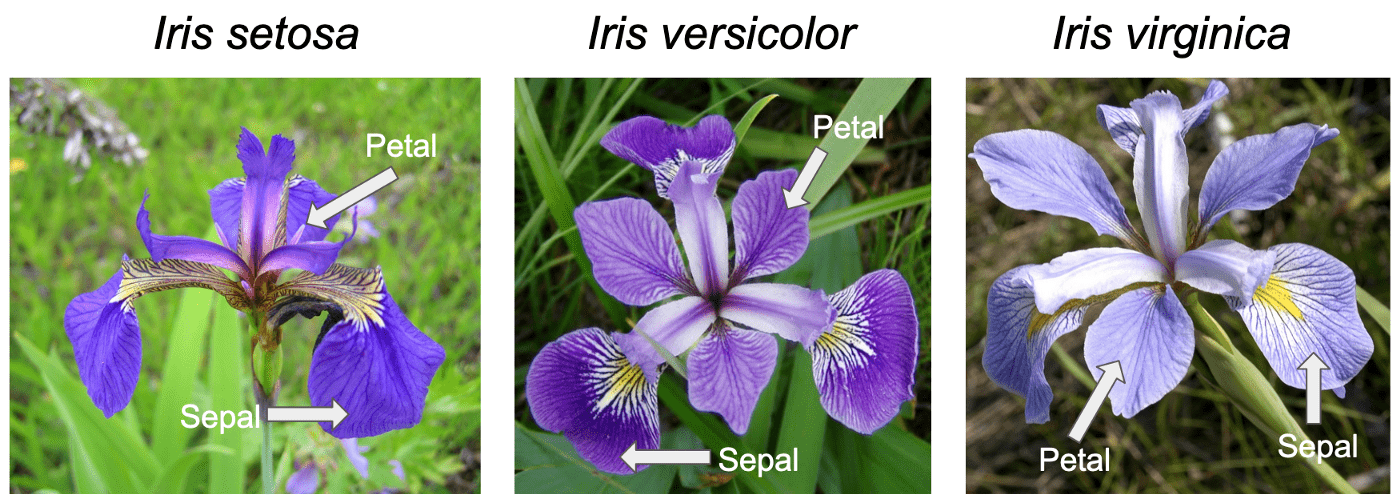

In [57]:
iris = load_iris() # load the data, this is a function that we imported
X = iris.data # these are the features
y = iris.target # these are the labels either "setosa", "versicolor", or "virginica"

# create a dataframe
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Create a train-test split

In [59]:
from sklearn.model_selection import train_test_split

# create train-test split. We use random state=0 to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.333)

In [60]:
type(X_train)

numpy.ndarray

Make train and test dataframes (this isn't necessary, but is helpful for visualizing the data)

In [61]:
df_train = pd.DataFrame(X_train, columns=iris.feature_names)
df_train['species'] = pd.Categorical.from_codes(y_train, iris.target_names)

df_test = pd.DataFrame(X_test, columns=iris.feature_names)
df_test['species'] = pd.Categorical.from_codes(y_test, iris.target_names)

df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.6,2.5,3.9,1.1,versicolor
1,7.7,3.0,6.1,2.3,virginica
2,6.3,3.3,4.7,1.6,versicolor
3,5.5,2.4,3.8,1.1,versicolor
4,6.3,2.7,4.9,1.8,virginica


How big are the two datasets?

In [62]:
print(len(df_train))
print(len(df_test))

100
50


## Train the decision tree

Initialize a decision tree object

In [63]:
dt = DecisionTreeClassifier(max_depth=2, random_state=0) # we'll set max_depth=2 to keep the tree simple

Fit the tree to the test data

In [64]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [65]:
dt

DecisionTreeClassifier(max_depth=2, random_state=0)

In [66]:
export_graphviz(dt, out_file='tree.dot', feature_names=iris.feature_names)



In [67]:
# convert dot file to png
!dot -Tpng tree.dot -o tree.png

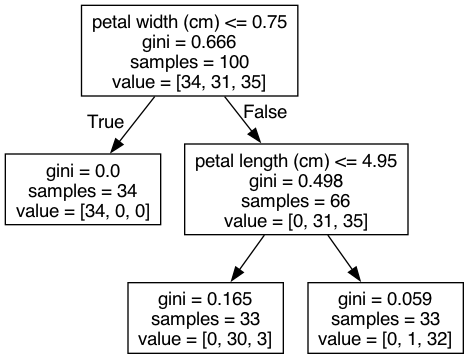

In [68]:
# display png
from IPython.display import Image
Image(filename='tree.png')


## Evaluate the decision tree

What is the train accuracy?

In [69]:
train_accuracy = dt.score(X_train, y_train)
print('Train accuracy: %.2f' % train_accuracy)

Train accuracy: 0.96


What is the test accuracy?

In [70]:
test_accuracy = dt.score(X_test, y_test)
print('Test accuracy: %.2f' % test_accuracy)

Test accuracy: 0.92


What classes have mistakes?

In [74]:
# see which samples are misclassified
y_pred = dt.predict(X_train)
misclassified = X_train[y_pred != y_train]

df_misclassified = pd.DataFrame(misclassified, columns=iris.feature_names)
df_misclassified['species'] = pd.Categorical.from_codes(y_pred[y_pred != y_train], iris.target_names)
df_misclassified.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,6.3,2.7,4.9,1.8,versicolor
1,4.9,2.5,4.5,1.7,versicolor
2,6.0,3.0,4.8,1.8,versicolor
3,6.7,3.0,5.0,1.7,virginica


In [73]:
# see which samples are misclassified
y_pred = dt.predict(X_test)
misclassified = X_test[y_pred != y_test]

df_misclassified = pd.DataFrame(misclassified, columns=iris.feature_names)
df_misclassified['species'] = pd.Categorical.from_codes(y_pred[y_pred != y_test], iris.target_names)
df_misclassified.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.6,2.8,4.9,2.0,versicolor
1,6.2,2.8,4.8,1.8,versicolor
2,6.1,3.0,4.9,1.8,versicolor
3,6.0,2.7,5.1,1.6,virginica


## Question: 
What if we hadn't limited the depth of the tree?

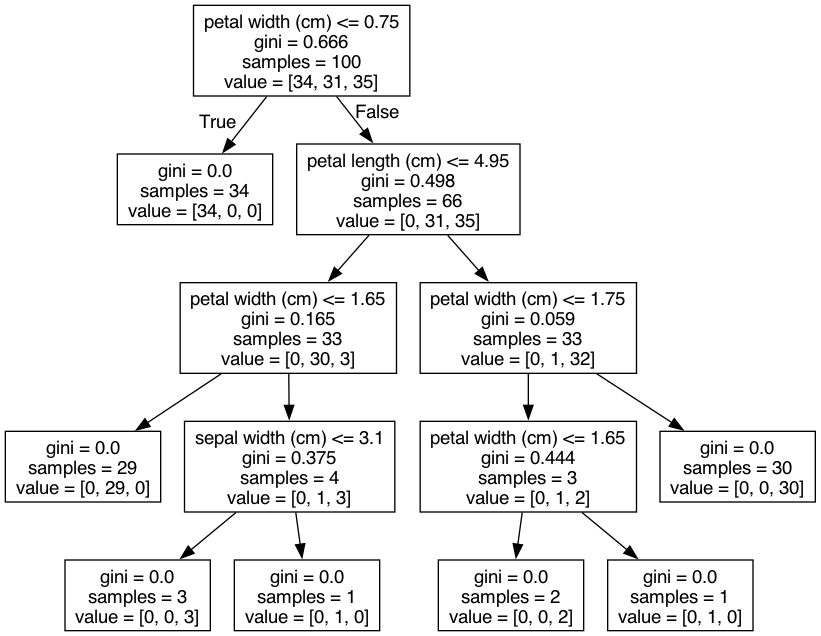

In [75]:
dt = DecisionTreeClassifier(random_state=0) # no max depth
dt.fit(X_train, y_train)

export_graphviz(dt, out_file='tree_deep.dot', feature_names=iris.feature_names)
!dot -Tpng tree_deep.dot -o tree_deep.png

Image(filename='tree_deep.png')

What is the train accuracy on the deep tree?

In [76]:
train_accuracy = dt.score(X_train, y_train)
print('Train accuracy: %.2f' % train_accuracy)

Train accuracy: 1.00


What about test accuracy?

In [77]:
test_accuracy = dt.score(X_test, y_test)
print('Test accuracy: %.2f' % test_accuracy)

Test accuracy: 0.98


That is better. Does the extra complexity seem worth it?